In [1]:
from DataGenerator import DataGenerator
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dg = DataGenerator(5, 10, "d:/Adrien/dataset/GlaS/train")

0.0 1.0000110234735244


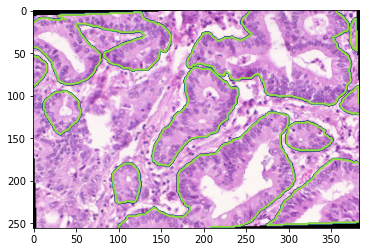

0.0 0.9964863132685586


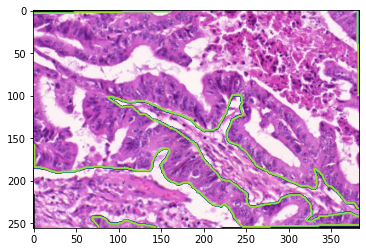

0.0 0.9950551997424044


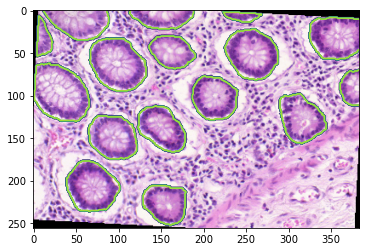

0.0 0.9967885169844


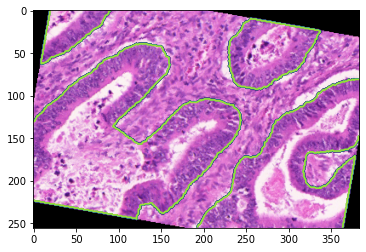

In [3]:
j = 0
for batch_x,batch_y in dg.next_batch(1):
    print(batch_x.min(),batch_x.max())
    for i in range(1):
        plt.figure()
        plt.imshow(batch_x[i])
        plt.contour(batch_y[i])
        plt.show()
    j += 1
    if j > 3:
        break

In [ ]:
batch_x,batch_y = DataGenerator._DataGenerator__augment(batch_x, batch_y)

In [ ]:
print(batch_y.max())
for i in range(5):
    plt.figure()
    plt.imshow(batch_x[i]+.5)
    plt.contour(batch_y[i])
    plt.show()

In [ ]:
im = dg.images[dg.train_idxs[0]]
anno = dg.annotations[dg.train_idxs[0]]

In [ ]:
plt.figure()
plt.imshow(im)
plt.contour(anno)
plt.show()

In [ ]:
# Vertical flip:
im2 = im[::-1,:,:]
plt.figure()
plt.imshow(im2)
plt.show()

In [ ]:
# Horizontal flip
im2 = im[:,::-1,:]
plt.figure()
plt.imshow(im2)
plt.show()

In [ ]:
# Random noise
im2 = np.clip(im + np.random.normal(0, 0.1, size=im.shape),0,1)
plt.figure()
plt.imshow(im2)
plt.show()

In [ ]:
from skimage.transform import rotate
im2 = rotate(im, angle=int(np.random.random()*360))
plt.figure()
plt.imshow(im2)
plt.show()

In [ ]:
print(((np.random.random()<0.5)-0.5)*2)

In [ ]:
def augment(x, y):
    # apply to x & y
    flip_h = int(((np.random.random()<0.5)-0.5)*2)
    flip_v = int(((np.random.random()<0.5)-0.5)*2)
    rotation = int(np.random.random()*360)
        
    # apply to x only
    noise = np.random.normal(0, 0.1, size=x.shape)
    
    x = np.clip(rotate(x[::flip_v,::flip_h]+noise, angle=rotation), 0, 1)
    y = rotate(y[::flip_v,::flip_h], angle=rotation)
    return x,y

In [ ]:
x2,y2 = augment(im, anno)
plt.figure()
plt.imshow(x2)
plt.contour(y2)
plt.show()